Feed Forward Neural Network

Tasks
- get data from mnist
- dataloader and transformation(to tensor)
- multilayer nn, activation functions
- loss and optimizer
- training loop/ batch training
- model evaluation
- GPU support

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Data transformation and visualization

In [3]:
#hyperparameters
input_size = 784 #28*28 flat pixels of image
batch_size = 2
num_classes = 10
num_epochs = 2
hidden_size = 100
learning_rate = 0.001

In [4]:
#MNIST <load data and transform>
train_dataset = torchvision.datasets.MNIST(root='./data', train= True, transform= transforms.ToTensor(), download= True)
test_dataset = torchvision.datasets.MNIST(root='./data', train= False, transform= transforms.ToTensor(), download= True)

train_loader = torch.utils.data.DataLoader(dataset= 'train_dataset', batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= 'test_dataset', batch_size=batch_size, shuffle=False)

In [7]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples,labels)

t a


TypeError: Image data of dtype <U1 cannot be converted to float

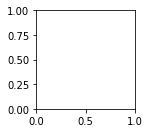

In [6]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

Model construction

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [8]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [9]:
#loss and criterion
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training [forward and backward pass]

In [10]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images= images.reshape(-1,28*28).to(device)
        labels= labels.to(device)

        #forward
        outputs = model(images)
        loss = criterion(outputs,labels)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

AttributeError: 'str' object has no attribute 'reshape'

Testing [checking accuracy]

In [11]:
#testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images= images.reshape(-1,28*28).to(device)
        labels= labels.to(device)
        outputs = model(images)
        #value,index
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct/n_samples
    print(f'accuracy = {acc}')

AttributeError: 'str' object has no attribute 'reshape'